Handling Outliers with Z-score Method mostly this method is use to handle outliers when distribution is normal 

distribution


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv('placement.csv')

In [8]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [9]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

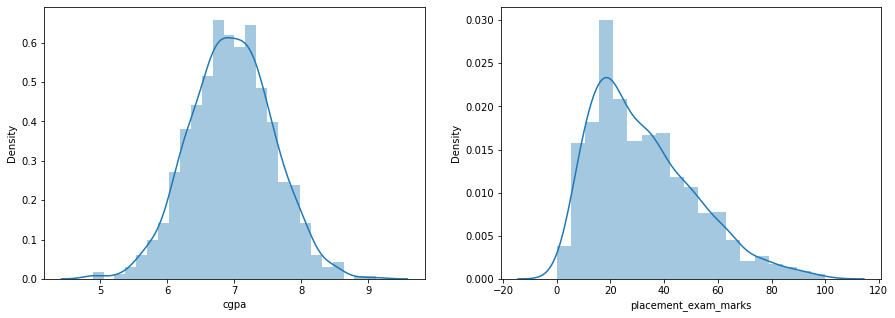

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])


plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

As we can see that CGPA column has normal distribution so we can apply z -score to remove the outliers if present

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa'>

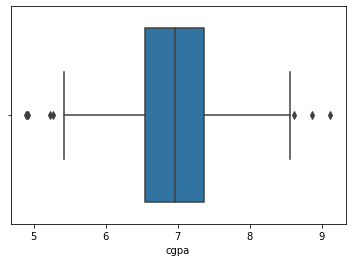

In [11]:
sns.boxplot(df['cgpa'])

Intution Behind Z-score 

Z-score=(X(i)-Mean)/Std

upperlimit=Mean+3*std


lowerlimit=Mean-3*std

In [12]:
df['z-score']=((df['cgpa']-df['cgpa'].mean())/df['cgpa'].std())

In [13]:
df.head()

,cgpa,placement_exam_marks,placed,z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [14]:
upperLimit=df['cgpa'].mean()+3*df['cgpa'].std()

lowerLimit=df['cgpa'].mean()-3*df['cgpa'].std()

In [15]:
print(upperLimit,lowerLimit)

8.808933625397177 5.113546374602842


In [16]:
df[df['cgpa']>upperLimit]

,cgpa,placement_exam_marks,placed,z-score
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [17]:
df[df['cgpa']<lowerLimit]

,cgpa,placement_exam_marks,placed,z-score
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


As we can see we have 2 outliers present beyond upperlimit and 3 outliers present below the lowerlimit





Removing outliers using Triming and Caping

In [18]:
# Triming
new_df=df[(df['cgpa']>lowerLimit) & (df['cgpa']<upperLimit)]

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa'>

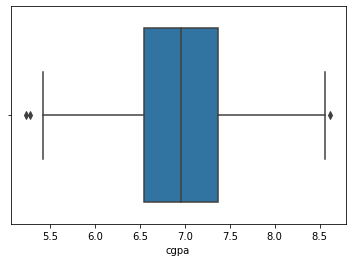

In [19]:
sns.boxplot(new_df['cgpa'])

As we all can see triming is not that effective when it comes to removing the outliers

In [20]:
#Caping


df['cgpa']=np.where(
    df['cgpa']>upperLimit,
    upperLimit,
    np.where(
        df['cgpa']<lowerLimit,
        lowerLimit,
        df['cgpa']
    )
)

In [ ]:
df['cgpa'].describe()